# Decision Trees with Ford Data

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report

from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression



In [2]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")
Ford = Ford.iloc[14:, :]
Ford = Ford.drop(["Nas_total", 'Stock_total', 'Dow_total'],axis=1) # to remove duplicated columns

In [3]:
Ford = Ford.dropna()
Ford = Ford[~(Ford.isin([np.inf, -np.inf]).any(axis=1))] 

In [4]:
Ford.shape

(709, 166)

## DT Target_3

In [5]:
target_3 = Ford["target_3"] # target_3 will need to be removed from the X feature matrix later, before running the model
Ford = Ford.drop(['target_1', 'target_2', 'target_4', 'target_5'], axis=1)

#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford.columns)}

n = len(Ford)
X_train = Ford[0:int(n*0.9)]

X_test = Ford[int(n*0.9):]

y_train = target_3[0:int(n*0.9)]

y_test = target_3[int(n*0.9):]

In [6]:
counts = y_train.groupby(by = y_train).count()
counts = pd.Series(counts)
print(counts)

target_3
0    330
1    308
Name: target_3, dtype: int64


In [7]:
Mscaler = MinMaxScaler() # keeps binarys at zero and 1 :)

X_train = pd.DataFrame(Mscaler.fit_transform(X_train), columns = Ford.columns)
X_test = pd.DataFrame(Mscaler.fit_transform(X_test), columns = Ford.columns)

In [8]:
corr_matrix = X_train.corr()
corr_matrix

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,...,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_3
Ford,1.000000,0.055530,0.303091,0.203195,0.143298,0.010524,0.010353,0.011126,0.011503,0.026041,...,0.004212,0.000721,0.012264,0.081840,0.053224,0.078331,-0.023868,-0.005256,-0.001664,-0.013346
F-150,0.055530,1.000000,0.029974,0.083337,0.051831,0.008371,0.010114,0.008181,0.008227,0.042126,...,0.019319,0.030861,-0.053418,-0.041889,-0.067631,-0.038095,-0.025702,-0.071468,0.029174,0.020247
Ford Bronco_x,0.303091,0.029974,1.000000,-0.002140,0.077278,-0.145593,-0.144943,-0.148706,-0.146625,0.122505,...,0.045998,0.001664,0.032298,0.043726,0.063731,0.047417,-0.012320,0.004763,0.046948,0.011493
Ford Mustang_x,0.203195,0.083337,-0.002140,1.000000,-0.042624,0.034321,0.032292,0.035977,0.033809,-0.029659,...,-0.033294,-0.012441,-0.012012,0.052654,0.008364,-0.008286,-0.027281,-0.003401,-0.023172,-0.040515
Ford Stock,0.143298,0.051831,0.077278,-0.042624,1.000000,-0.020361,-0.012056,-0.024015,-0.017820,0.273009,...,0.029172,-0.028680,0.009628,0.003761,-0.015070,0.019798,-0.011771,-0.043662,-0.043738,-0.043700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dow_EMA_Move,0.078331,-0.038095,0.047417,-0.008286,0.019798,-0.007689,-0.003735,0.000116,0.004701,-0.023049,...,-0.219005,0.061855,0.457231,0.630811,0.571714,1.000000,0.188460,0.127774,-0.128961,-0.024764
Dow_Disparity_Move,-0.023868,-0.025702,-0.012320,-0.027281,-0.011771,-0.034857,-0.029958,-0.027774,-0.021483,-0.045889,...,-0.026343,0.034558,0.684861,0.095261,0.346229,0.188460,1.000000,0.689436,-0.247025,0.004333
Dow_Disparity_s_Move,-0.005256,-0.071468,0.004763,-0.003401,-0.043662,-0.034429,-0.029821,-0.028268,-0.021164,-0.016133,...,-0.027871,0.030772,0.651924,0.093663,0.295795,0.127774,0.689436,1.000000,-0.256670,0.046095
Dow_RSI_Move,-0.001664,0.029174,0.046948,-0.023172,-0.043738,0.007763,0.008023,0.005319,0.004846,0.034550,...,0.042829,0.080299,-0.293303,-0.133400,-0.197153,-0.128961,-0.247025,-0.256670,1.000000,-0.049546


### Creating variables based on corrlation with target

In [70]:
#Top 40 variables by correlation with the target, not including target 3 which would have correlation = 1

feats_corr = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[1:41]).reset_index()['index'])

In [71]:
feats_corr

['Dow_rs',
 'Stock_Disparity_s_Move',
 'Wiki_RSI',
 'Dow_avg_loss',
 'Nas_Disparity_s_Move',
 'Wiki_Disparity_Move',
 'Nas_avg_loss',
 'Dow_Disparity_s_Move',
 'Nas_Move',
 'Ford Bronco_y',
 'Google_Rocp',
 'Stock_rs',
 'Google_avg_gain',
 'Google_Disparity_s_Move',
 'Wiki_diff',
 'Dividends',
 'Google_RSI_Move',
 'Wiki_gain',
 'Wiki_RSI_Move',
 'Wiki_Move',
 'Nas_Disparity_Move',
 'Dow_Move',
 'Wiki_Disparity_s',
 'Wiki_Disparity_s_Move',
 'Nas_EMA_Move',
 'F-150',
 'Nas_rs',
 'Nas_MAvg',
 'Nas_MAvg_s',
 'Nas_EMA',
 'nas_high',
 'nas_open',
 'nas_close',
 'nas_low',
 'Nas_diff',
 'Nas_gain',
 'Dow_MAvg_s_Move',
 'Ford Bronco_x',
 'Nas_loss',
 'Google_loss']

In [72]:
X_train_cr = X_train[feats_corr]
X_test_cr = X_test[feats_corr]

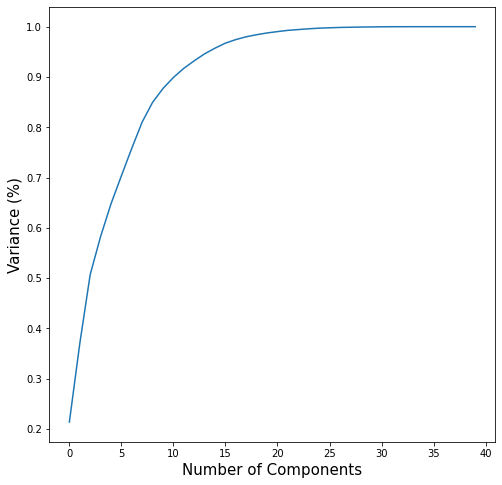

array([ 21.39811611,  36.96856988,  50.71125516,  58.27146789,
        64.76886102,  70.35964282,  75.83467656,  81.05872797,
        84.9608754 ,  87.71784054,  89.9071076 ,  91.72545738,
        93.21833063,  94.6077491 ,  95.72999409,  96.73463635,
        97.43840742,  97.99708832,  98.40453544,  98.75395643,
        99.02377172,  99.2712578 ,  99.42853591,  99.58165275,
        99.70898781,  99.7820405 ,  99.8511437 ,  99.88970453,
        99.92676927,  99.95236419,  99.97643624,  99.99383677,
        99.9960879 ,  99.99825768,  99.99890144,  99.99942127,
        99.99970437,  99.99986427, 100.        , 100.        ])

In [73]:
pca = PCA().fit(X_train_cr)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 10 compenents explain 85% 

In [74]:
pca_cr = PCA(n_components = 10).fit(X_train_cr.to_numpy())
X_train_cr = pca_cr.transform(X_train_cr.to_numpy())
X_test_cr = pca_cr.transform(X_test_cr.to_numpy())

### Creating varaibles based on kbest

In [78]:
# apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=f_regression, k=41)
best_fit = bestfeatures.fit(X_train, y_train)
best_scores = pd.DataFrame(best_fit.scores_)
best_columns = pd.DataFrame(Ford.columns)

# concatenate the dataframes for better visualization
features_score = pd.concat([best_columns, best_scores], axis=1)
features_score.columns = ['Features', 'Score'] 
feats_kb = list(features_score.nlargest(41, 'Score').iloc[1:41]['Features'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [79]:
feats_kb

['Stock_Moment_2',
 'Dow_rs',
 'Stock_EMA_Move',
 'Stock_Moment_1',
 'Stock_ROC',
 'Google_Moment_1',
 'Google_ROC',
 'Wiki_MAvg_s_Move',
 'Stock_Disparity_s_Move',
 'Wiki_EMA_Move',
 'Wiki_RSI',
 'Stock_Moment_2_s',
 'Dow_Rocp',
 'Dow_RSI_Move',
 'Dow_avg_loss',
 'Google_MAvg_Move',
 'Nas_Disparity_s_Move',
 'Wiki_Disparity_Move',
 'Nas_avg_loss',
 'Dow_Disparity_s_Move',
 'Ford GT',
 'Dow_MAvg_Move',
 'Wiki_MAvg_Move',
 'Nas_Move',
 'Nas_RSI_Move',
 'Ford Stock',
 'Dow_avg_gain',
 'Google_Moment_2',
 'Ford Mustang_x',
 'Google_EMA_Move',
 'Stock_MAvg_s_Move',
 'Ford Bronco_y',
 'Google_Rocp',
 'Stock_RSI',
 'Ford Mustang_y',
 'Stock_MAvg_Move',
 'Stock_rs',
 'Dow_RSI',
 'Google_avg_loss',
 'Google_avg_gain']

In [80]:
X_train_kb = X_train[feats_kb]
X_test_kb = X_test[feats_kb]

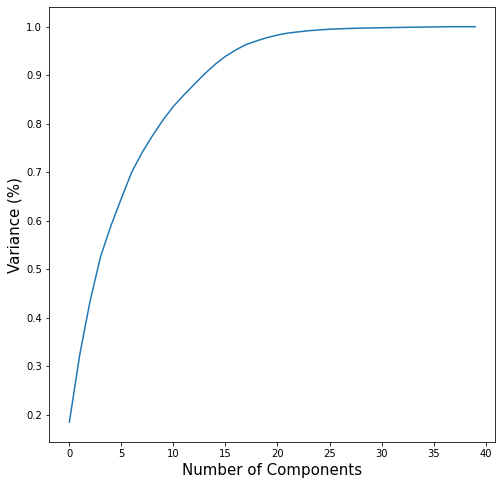

array([ 18.4673924 ,  32.37500817,  43.52725078,  52.58743065,
        58.97697167,  64.61332934,  70.04314455,  74.08766823,
        77.55668396,  80.74843426,  83.57480127,  85.8951313 ,
        88.11004323,  90.27244815,  92.22386913,  93.88303033,
        95.21287113,  96.33585451,  97.0750919 ,  97.74799208,
        98.27822374,  98.68931938,  98.93312087,  99.16962171,
        99.33417745,  99.46903723,  99.56455428,  99.64346517,
        99.69762014,  99.74092235,  99.78092561,  99.81959765,
        99.85372476,  99.8865296 ,  99.91823486,  99.9476906 ,
        99.97473349, 100.        , 100.        , 100.        ])

In [81]:
pca = PCA().fit(X_train_kb)
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize=(15))
plt.ylabel('Variance (%)', fontsize=(15)) # for each component
plt.show()
np.cumsum(pca.explained_variance_ratio_) * 100
# 12 compenents explain 85% 

In [82]:
pca_kb = PCA(n_components = 12).fit(X_train_kb.to_numpy())
X_train_kb = pca_kb.transform(X_train_kb.to_numpy())
X_test_kb = pca_kb.transform(X_test_kb.to_numpy())

## Modeling Correlated Variables 

In [83]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train_cr,y_train)

model.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   3.8s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.641 total time=   3.8s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.625 total time=   3.8s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   3.8s
[CV 7/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   3.9s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   4.0s

{'n_estimators': 95,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 671,
 'criterion': 'gini'}

In [84]:
y_cr_hat = model.best_estimator_.predict(X_test_cr)
y_cr_hat

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0])

In [85]:
accuracy_score(y_test, y_cr_hat)

0.5211267605633803

# Modeling K Best Variables

In [88]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}

clf = RandomForestClassifier()
model_kb = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb.fit(X_train_kb,y_train)

model_kb.best_params_

y_kb_hat = model_kb.best_estimator_.predict(X_test_kb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   5.4s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.516 total time=   5.4s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   5.5s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   5.5s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.531 total time=   5.2s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   5.1s

In [89]:
accuracy_score(y_test, y_kb_hat)

0.4647887323943662

# Hyper Parmeter Tuning # of Correlation Based Variables

In [9]:
feats_corr_1 = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[1:11]).reset_index()['index'])
feats_corr_2 = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[1:26]).reset_index()['index'])
feats_corr_3 = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[1:76]).reset_index()['index'])
feats_corr_4 = list(pd.DataFrame(corr_matrix['target_3'].sort_values(ascending=False).iloc[1:101]).reset_index()['index'])

X_train_cr_1 = X_train[feats_corr_1]
X_test_cr_1 = X_test[feats_corr_1]
X_train_cr_2 = X_train[feats_corr_2]
X_test_cr_2 = X_test[feats_corr_2]
X_train_cr_3 = X_train[feats_corr_3]
X_test_cr_3 = X_test[feats_corr_3]
X_train_cr_4 = X_train[feats_corr_4]
X_test_cr_4 = X_test[feats_corr_4]

def pca_finder(df, df_test):
    
    pca = PCA().fit(df)
    pca_scores = np.cumsum(pca.explained_variance_ratio_) * 100
    res = next(x for x, val in enumerate(pca_scores) if val > 85)
    res = res + 1
    res
    
    pca_cr_1 = PCA(n_components = res).fit(df.to_numpy())
    df = pca_cr_1.transform(df.to_numpy())
    df_test = pca_cr_1.transform(df_test.to_numpy())
    return df, df_test

X_train_cr_1, X_test_cr_1 = pca_finder(X_train_cr_1, X_test_cr_1)


In [10]:
X_train_cr_2, X_test_cr_2 = pca_finder(X_train_cr_2, X_test_cr_2)
X_train_cr_3, X_test_cr_3 = pca_finder(X_train_cr_3, X_test_cr_3)
X_train_cr_4, X_test_cr_4 = pca_finder(X_train_cr_4, X_test_cr_4)

In [106]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}
clf = RandomForestClassifier()
model1 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
                               
model1.fit(X_train_cr_1,y_train)
y_hat_cr_1 = model1.best_estimator_.predict(X_test_cr_1)
accuracy_score(y_test, y_hat_cr_1)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.594 total time=   4.3s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   4.6s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   4.7s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   4.7s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   7.1s
[CV 7/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   6.7s

0.6197183098591549

In [107]:
model2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
                               
model2.fit(X_train_cr_2,y_train)
y_hat_cr_2 = model2.best_estimator_.predict(X_test_cr_2)
accuracy_score(y_test, y_hat_cr_2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   5.9s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   5.9s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   6.0s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.562 total time=   6.0s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   5.2s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   5.3s

0.5070422535211268

In [108]:
model3 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
                               
model3.fit(X_train_cr_3,y_train)
y_hat_cr_3 = model3.best_estimator_.predict(X_test_cr_3)
accuracy_score(y_test, y_hat_cr_3)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.391 total time=   3.2s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   3.2s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   3.2s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.609 total time=   3.2s
[CV 7/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   3.4s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   3.4s

0.4647887323943662

In [110]:
model4 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
                               
model4.fit(X_train_cr_4,y_train)
y_hat_cr_4 = model4.best_estimator_.predict(X_test_cr_4)
accuracy_score(y_test, y_hat_cr_4)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.453 total time=   3.6s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   3.6s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   3.7s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   3.7s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.453 total time=   3.7s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.406 total time=   3.7s

KeyboardInterrupt: 

# Hyper Paramter Tuning, # K Best Variables

In [11]:
def kbest_creator(k, df, df_test):
    """
    returns list of k best features and the number of efficient principle compents to use with said k features
    """
    # apply SelectKBest class to extract top 40 best features
    bestfeatures = SelectKBest(score_func=f_regression, k=k)
    best_fit = bestfeatures.fit(df, y_train)
    best_scores = pd.DataFrame(best_fit.scores_)
    best_columns = pd.DataFrame(Ford.columns)
    
    # concatenate the dataframes for better visualization
    features_score = pd.concat([best_columns, best_scores], axis=1)
    features_score.columns = ['Features', 'Score']  # naming the dataframe columns
    feats_kb = list(features_score.nlargest(k, 'Score').iloc[1:k]['Features'])

    pca = PCA().fit(df[feats_kb])
    pca_scores = np.cumsum(pca.explained_variance_ratio_) * 100
    res = next(x for x, val in enumerate(pca_scores) if val > 85)
    res = res + 1
    res
    
    pca_kb_1 = PCA(n_components = res).fit(df[feats_kb].to_numpy())
    df = pca_kb_1.transform(df[feats_kb].to_numpy())
    df_test = pca_kb_1.transform(df_test[feats_kb].to_numpy())
    return df, df_test


In [12]:
X_train_kb_1, X_test_kb_1, = kbest_creator(11, X_train, X_test)
X_train_kb_2, X_test_kb_2, = kbest_creator(26, X_train, X_test)
X_train_kb_3, X_test_kb_3, = kbest_creator(76, X_train, X_test)
X_train_kb_4, X_test_kb_4, = kbest_creator(101, X_train, X_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [15]:
# apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=f_regression, k=11)
best_fit = bestfeatures.fit(X_train, y_train)
best_scores = pd.DataFrame(best_fit.scores_)
best_columns = pd.DataFrame(Ford.columns)
    
# concatenate the dataframes for better visualization
features_score = pd.concat([best_columns, best_scores], axis=1)
features_score.columns = ['Features', 'Score']  # naming the dataframe columns
feats_kb_1 = list(features_score.nlargest(10, 'Score').iloc[1:11]['Features'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [16]:
feats_corr_1,feats_kb_1

(['Dow_rs',
  'Stock_Disparity_s_Move',
  'Wiki_RSI',
  'Dow_avg_loss',
  'Nas_Disparity_s_Move',
  'Wiki_Disparity_Move',
  'Nas_avg_loss',
  'Dow_Disparity_s_Move',
  'Nas_Move',
  'Ford Bronco_y'],
 ['Stock_Moment_2',
  'Dow_rs',
  'Stock_EMA_Move',
  'Stock_Moment_1',
  'Stock_ROC',
  'Google_Moment_1',
  'Google_ROC',
  'Wiki_MAvg_s_Move',
  'Stock_Disparity_s_Move'])

In [18]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(10, 1200, 15, dtype = int))}
clf = RandomForestClassifier()
model1 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb1 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb1.fit(X_train_kb_1,y_train)

y_kb_hat_1 = model_kb1.best_estimator_.predict(X_test_kb_1)
accuracy_score(y_test, y_kb_hat_1)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.531 total time=   4.0s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   4.0s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   4.1s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.406 total time=   4.1s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.562 total time=   3.3s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.453 total time=   3.3s

0.4647887323943662

In [19]:
model_kb2 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb2.fit(X_train_kb_2,y_train)

y_kb_hat_2 = model_kb2.best_estimator_.predict(X_test_kb_2)
accuracy_score(y_test, y_kb_hat_2)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.516 total time=   3.6s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   3.5s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.500 total time=   3.6s
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.562 total time=   3.6s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   3.7s
[CV 7/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.609 total time=   3.7s

0.5915492957746479

In [20]:
model_kb3 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb3.fit(X_train_kb_3,y_train)

y_kb_hat_3 = model_kb3.best_estimator_.predict(X_test_kb_3)
accuracy_score(y_test, y_kb_hat_3)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   3.6s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.578 total time=   3.6s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.453 total time=   3.7s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.469 total time=   3.7s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.516 total time=   3.6s
[CV 7/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.484 total time=   3.6s

0.352112676056338

In [21]:
model_kb4 = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 10, verbose= 5, random_state= 101, n_jobs = -1)
model_kb4.fit(X_train_kb_4,y_train)

y_kb_hat_4 = model_kb4.best_estimator_.predict(X_test_kb_4)
accuracy_score(y_test, y_kb_hat_4)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 3/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.594 total time=   3.8s
[CV 4/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.609 total time=   3.9s
[CV 1/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.562 total time=   4.0s
[CV 2/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.531 total time=   4.1s
[CV 5/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.438 total time=   4.0s
[CV 6/10] END criterion=gini, max_depth=274, max_features=log2, min_samples_leaf=12, min_samples_split=5, n_estimators=945;, score=0.547 total time=   3.9s

0.4225352112676056